In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False

from __future__ import division

#import numpy as np
#import pandas as pd
#import itertools

import logging
logger = logging.getLogger()

19 Fibonacci Heaps
==========
dual purpose:

1. support a set of operations of 'mergeable heap'.

2. its several Fibonacci-heap operations run in constant amortized time.

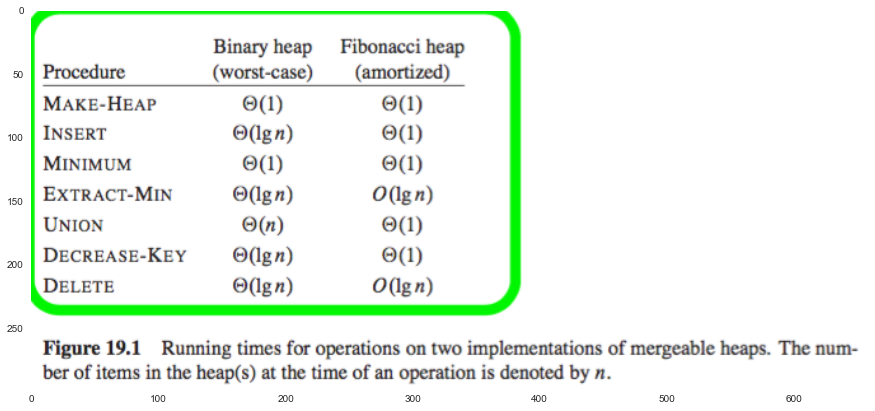

In [2]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('./res/fig19_1.png'))

In theory:      
Fibonacci heaps are especially desiable when the number of EXTRAC-MIN and DELETE operations is **small** relative to the number of other operations performed.

In practice:    
Ordinary binary heaps are more preferred because of the constant factors and programing complexity of Fibonacci heaps.

### 19.1 Structure of Fibonacci heaps
A **Fibonacci heap** is a collection of rooted trees that are **min-heap ordered**(the key of a node is greater than or equal to the key of its parent). 

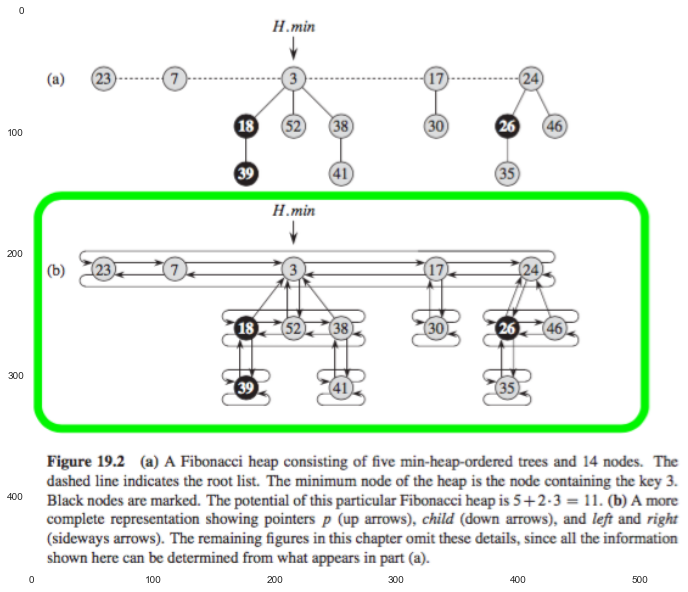

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('./res/fig19_2.png'))

Links:     

1. each node $x$ contains a pointer $x.p$ to its parent and a pointer $x.child$ to **any one** of its children.

2. **child list** of $x$: The children of $x$ are linked together in a **circular, doubly** linked list. Each child $y$ in a child list has pointers $y.left$ and $y.right$.      
   Why doubly linked lists?       
   + Insert or remove diretcly.     
   + Concatenate easily.
   
Attributes:

1. For each node $x$:      
   + $x.degree$: the number of children in the child list of node $x$.     
   + $x.mark$: whether node $x$ has lost a child since the last time $x$ was made the child of another node. (DECRESE-KEY operation).
   
2. For heap $H$:     
   + $H.min$: root pointer.     
   + $H.n$: the number of nodes currently in $H$.
   
#### Potential function
$$\phi (H) = t(H) + 2 m(H)$$
where $t(H)$ is the number of trees in the root list and $m(H)$ is the number of marked nodes.

#### Maximum degree
An upper bound $D(n)$ on the maximum degree of any node in an $n$-node Fibonacci heap: $D(n) \leq \lfloor \lg n \rfloor$.

### 19.2 Mergeable-heap operations
core: delay work as long as possible.

#### Creating a new Fibonacci heap
allocates and returns the Fibonacci heap object $H$, where $H.n = 0$ and $H.min = NIL$.

#### Inserting a node
insert $x$ into $H$'s root list

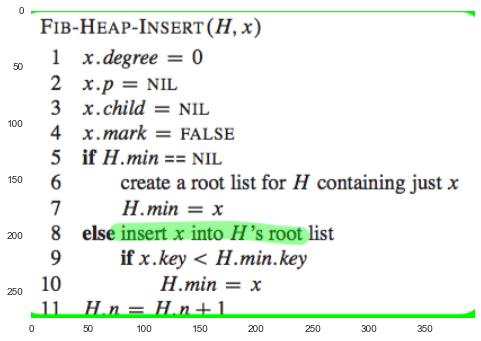

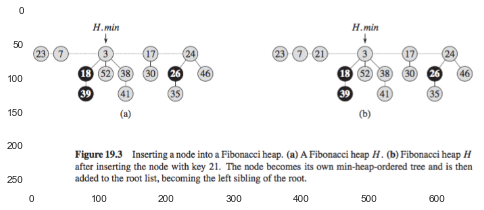

In [8]:
plt.figure()
plt.imshow(plt.imread('./res/fig19_3a.png'))
plt.figure()
plt.imshow(plt.imread('./res/fig19_3.png'))

#### Finding the minimum node
given by the pointer $H.min$

#### Uniting two Fibonacci heaps
concatenates the root lists of $H_1$ and $H_2$ and then determines the new minimum node.

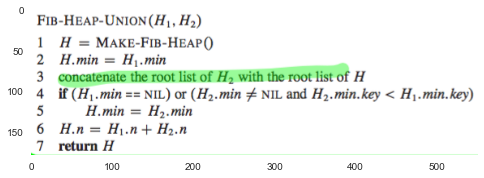

In [9]:
plt.imshow(plt.imread('./res/fig19_unit.png'))

#### Extracting the minimum node
$O(\lg n)$

extracte the minimum node, and also consolidate trees in the root list finally occurs.

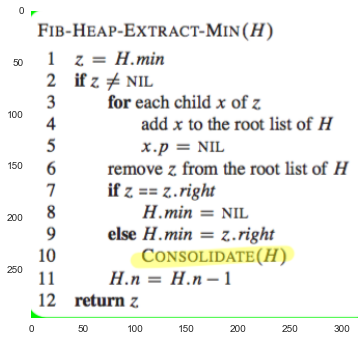

In [10]:
plt.imshow(plt.imread('./res/fig19_extract_min.png'))

##### consolidating 
consolidating the root list consists of repeatedly excuting the following steps until every root in the root list has a distince degree values:

1. Find two roots $x$ and $y$ in the root list with the same degree. Let $x.key \leq y.key$.

2. Link $y$ to $x$: remove $y$ from the root list, and make $y$ a child of $x$ by calling the FIB-HEAP-LINK procedure.

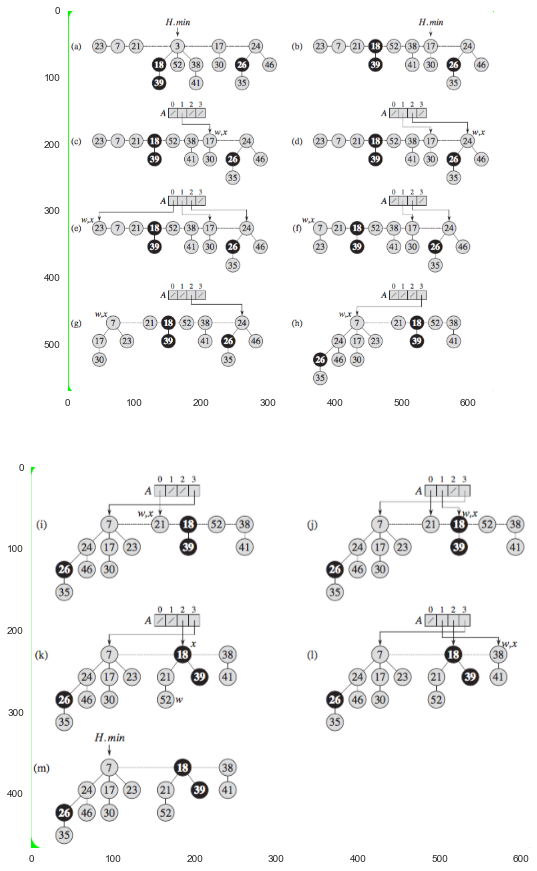

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
plt.imshow(plt.imread('./res/fig19_4a.png'))
plt.subplot(2,1,2)
plt.imshow(plt.imread('./res/fig19_4b.png'))

### 19.3 Decreasing a key and deleting a node
#### Decreasing a key
O(1)

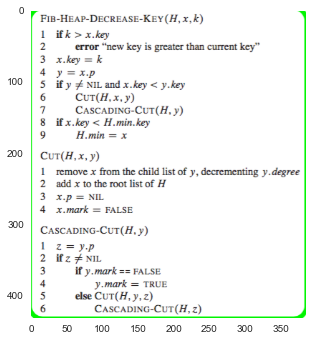

In [2]:
plt.imshow(plt.imread('./res/fig19_decrease.png'))

CUT: As soon as the second child has been lost, we cut $x$ from its parent, making it a new root.

CASCADING-CUT: because $x$ might be the second child cut from its parent $y$ since the time that $y$ was linked to another node, we perform a cascading-cut operation on $y$.

#### Deleting a node
O(lg n)

```
FIB-HEAP-DELETE(H, x)
    FIB-HEAP-DECREASE-KEY(H, x, $-\inf$)
    FIB-HEAP-EXTRACT-MIN(H)
```

In [3]:
#Exercises

### 19.4 Bounding the maximum degree
To prove FIB-HEAP-EXTRACT-MIN is $O(\lg n)$, we shall show that $D(n) \leq \lfloor \log_{\phi} n \rfloor$.

证明见书。